In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

# https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
df = pd.read_csv('medium/data/Space_Corrected.csv')
df

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [2]:
df['Datum'] = pd.to_datetime(df['Datum'], utc=True)
df['Rocket'] = pd.to_numeric(df[' Rocket'], errors='coerce')
df.drop([' Rocket', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [3]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Rocket
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,50.00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,29.75
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,65.00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,145.00
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,Failure,NaN
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,Success,NaN
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,Failure,NaN
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,NaN


In [4]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Status Mission', 'Rocket'],
      dtype='object')

C:\Users\thiag\anaconda3\envs\power-bi\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thiag\anaconda3\envs\power-bi\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


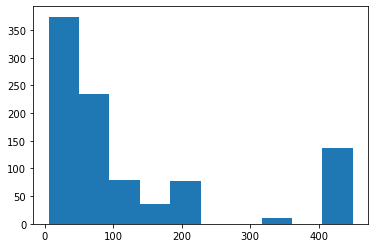

In [5]:
plt.hist(df.Rocket)
plt.show()

array([  5.3 ,  49.77,  94.24, 138.71, 183.18, 227.65, 272.12, 316.59,
       361.06, 405.53, 450.  ])

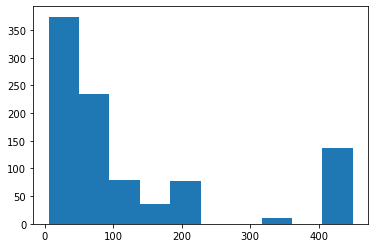

In [6]:
n, bins, patches = plt.hist(df.Rocket)
bins

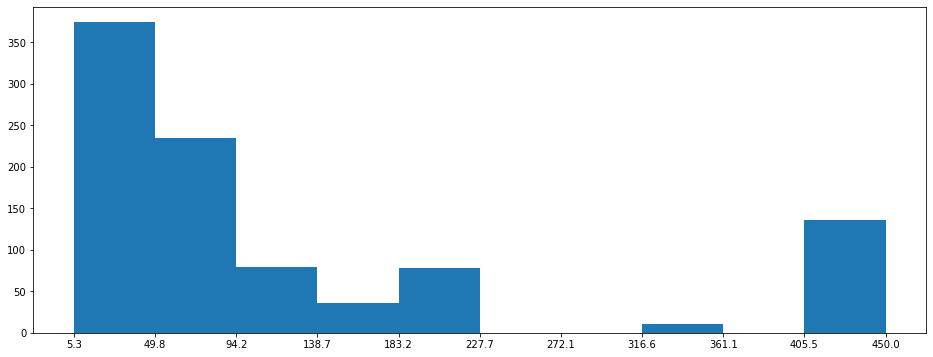

In [7]:
fig = plt.figure(figsize=(16,6))

n, bins, patches = plt.hist(df.Rocket)

plt.xticks(bins)
plt.show()

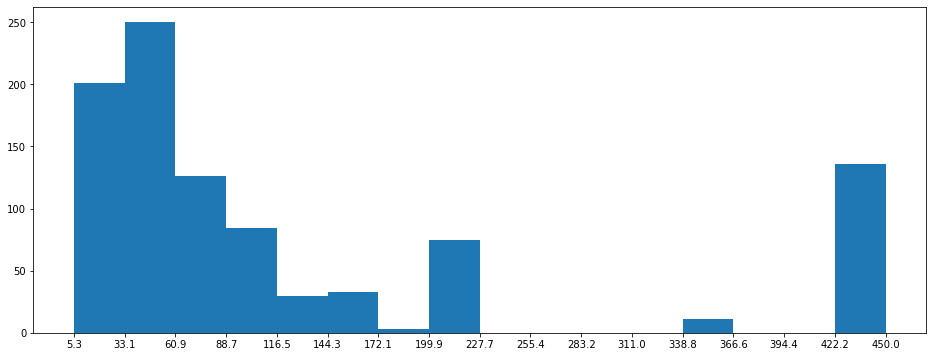

In [8]:
fig = plt.figure(figsize=(16,6))

n, bins, patches = plt.hist(df.Rocket, bins=16)

plt.xticks(bins)
plt.show()

C:\Users\thiag\anaconda3\envs\power-bi\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\thiag\anaconda3\envs\power-bi\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


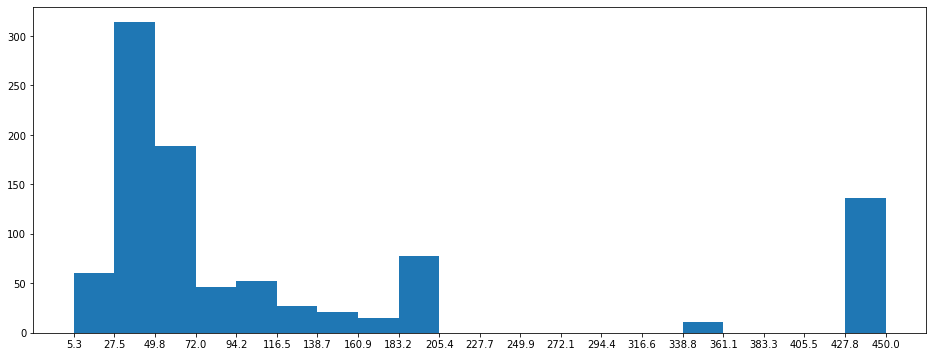

In [9]:
fig = plt.figure(figsize=(16,6))

# 'auto', 'sturges', 'fd', 'doane', 'scott', 'rice' or 'sqrt'
n, bins, patches = plt.hist(df.Rocket, bins='rice')

plt.xticks(bins)
plt.show()

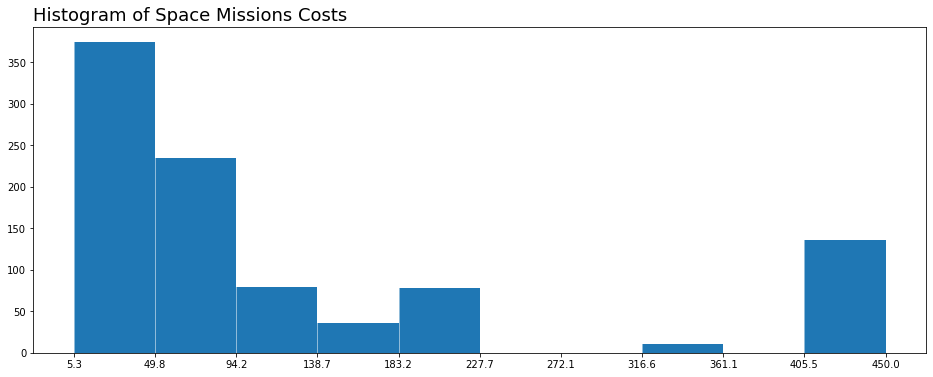

In [10]:
fig = plt.figure(figsize=(16,6))

n, bins, patches = plt.hist(df.Rocket)

plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')

plt.title('Histogram of Space Missions Costs', loc = 'left', fontsize = 18)
plt.show()

In [11]:
#bins
xticks_labels = [ "{:.2f} - {:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
print(xticks_labels, '\n')

['5.30 - 49.77', '49.77 - 94.24', '94.24 - 138.71', '138.71 - 183.18', '183.18 - 227.65', '227.65 - 272.12', '272.12 - 316.59', '316.59 - 361.06', '361.06 - 405.53', '405.53 - 450.00'] 



In [12]:
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
print(xticks)

[27.534999999999997, 72.005, 116.475, 160.945, 205.41500000000002, 249.885, 294.355, 338.825, 383.295, 427.765]


Text(0.0, 1.0, 'Histogram of Space Missions Costs (Millions of USD)')

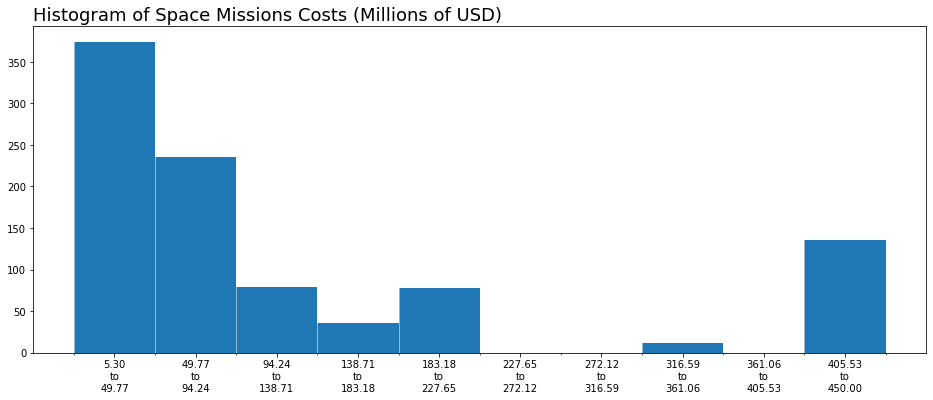

In [13]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(df.Rocket)

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

plt.title('Histogram of Space Missions Costs (Millions of USD)', loc = 'left', fontsize = 18)

Text(0.0, 1.0, 'Histogram of Space Missions Costs (Millions of USD)')

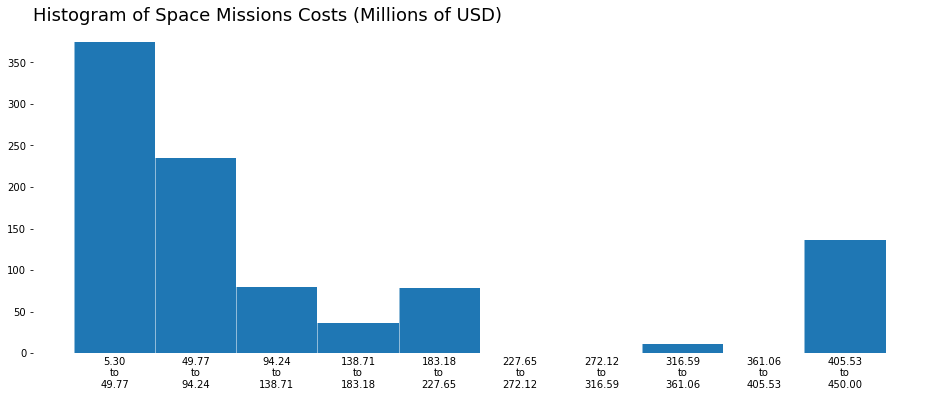

In [14]:
fig, ax = plt.subplots(1, figsize=(16,6))

n, bins, patches = plt.hist(df.Rocket)

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Histogram of Space Missions Costs (Millions of USD)', loc = 'left', fontsize = 18)

In [15]:
n

array([374., 235.,  79.,  36.,  78.,   0.,   0.,  11.,   0., 136.])

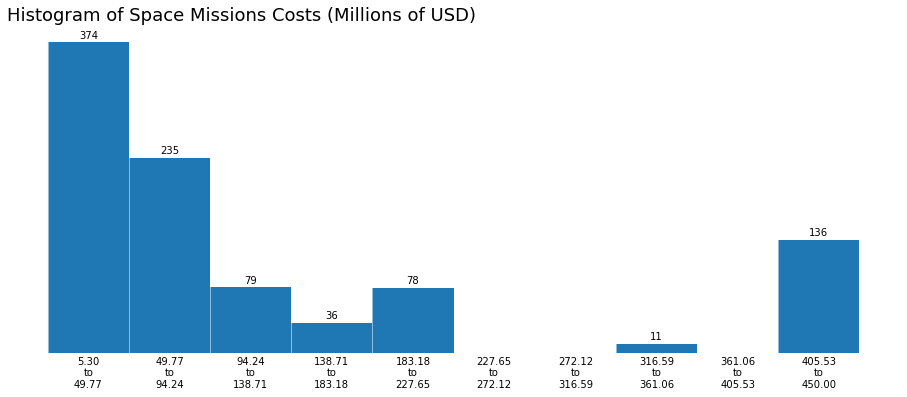

In [16]:
fig, ax = plt.subplots(1, figsize=(16,6))
n, bins, patches = plt.hist(df.Rocket)

# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)

# remove y ticks
plt.yticks([])

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')

plt.title('Histogram of Space Missions Costs (Millions of USD)', loc = 'left', fontsize = 18)
plt.show()

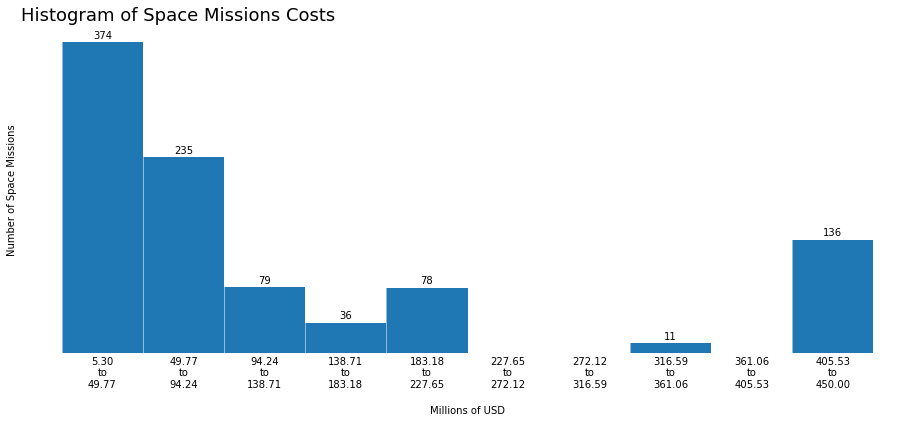

In [17]:
fig, ax = plt.subplots(1, figsize=(16,6))

n, bins, patches = plt.hist(df.Rocket)

minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')

plt.title('Histogram of Space Missions Costs', loc = 'left', fontsize = 18)
plt.xlabel('\nMillions of USD')
plt.ylabel('Number of Space Missions')
plt.show()

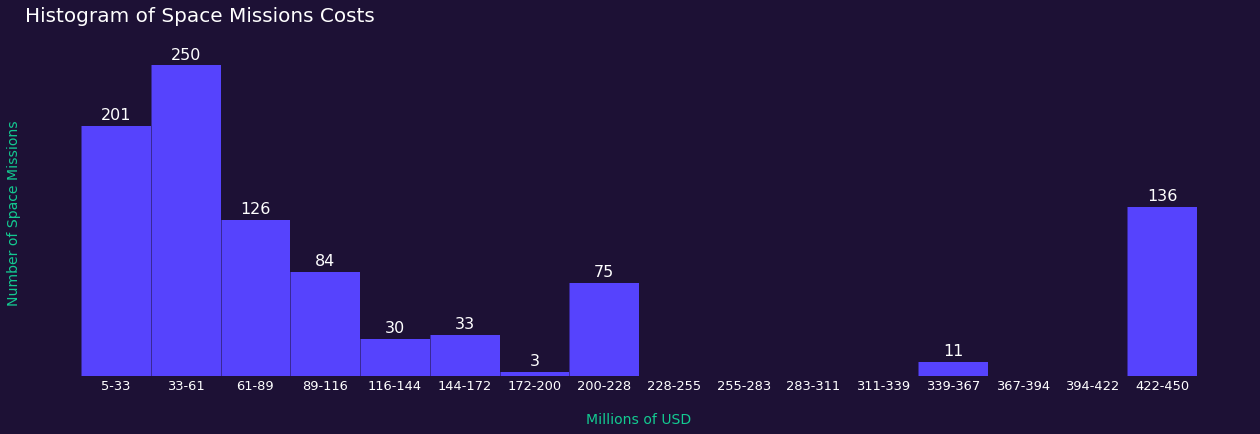

In [18]:
fig, ax = plt.subplots(1, figsize=(22,6), facecolor='#1d1135')
ax.set_facecolor('#1d1135')

n, bins, patches = plt.hist(df.Rocket, color='#5643fd', bins='doane')

#grid
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='#1d1135', lw = 0.5)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}-{:.0f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, c='w', fontsize=13)
# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center', fontsize = 16, c='w')

plt.title('Histogram of Space Missions Costs\n', loc = 'left', fontsize = 20, c='w')
plt.xlabel('\nMillions of USD', c='#13ca91', fontsize=14)
plt.ylabel('Number of Space Missions', c='#13ca91', fontsize=14)
plt.show()

In [19]:
print(df.Datum.min())
print(df.Datum.max())

1957-10-04 19:28:00+00:00
2020-08-07 05:12:00+00:00


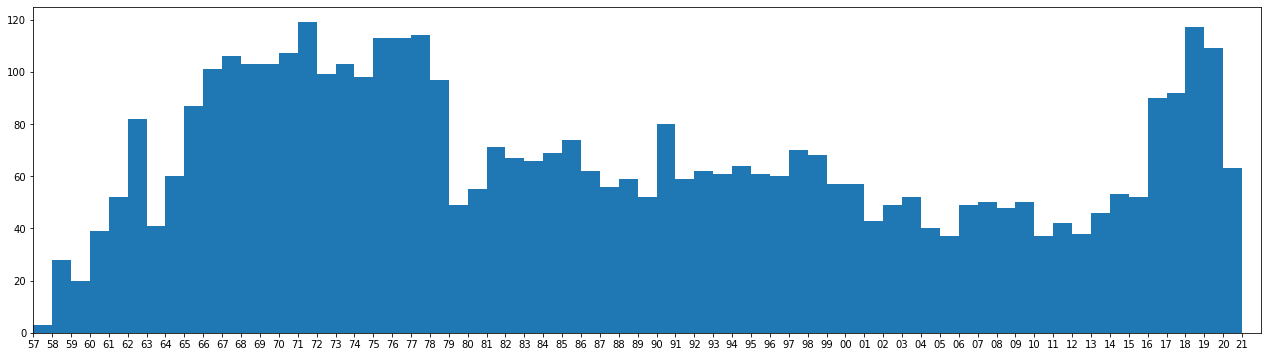

In [20]:
import matplotlib.dates as mdates

# convert the date format to matplotlib date format 
plt_date = mdates.date2num(df['Datum'])
bins = mdates.datestr2num(["{}/01/01".format(i) for i in np.arange(1957, 2022)])

# plot it
fig, ax = plt.subplots(1, figsize=(22,6))
n, bins, patches = plt.hist(plt_date, bins=bins)

# x ticks and limit
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.xlim(mdates.datestr2num(['1957/01/01','2021/12/31']))

plt.show()

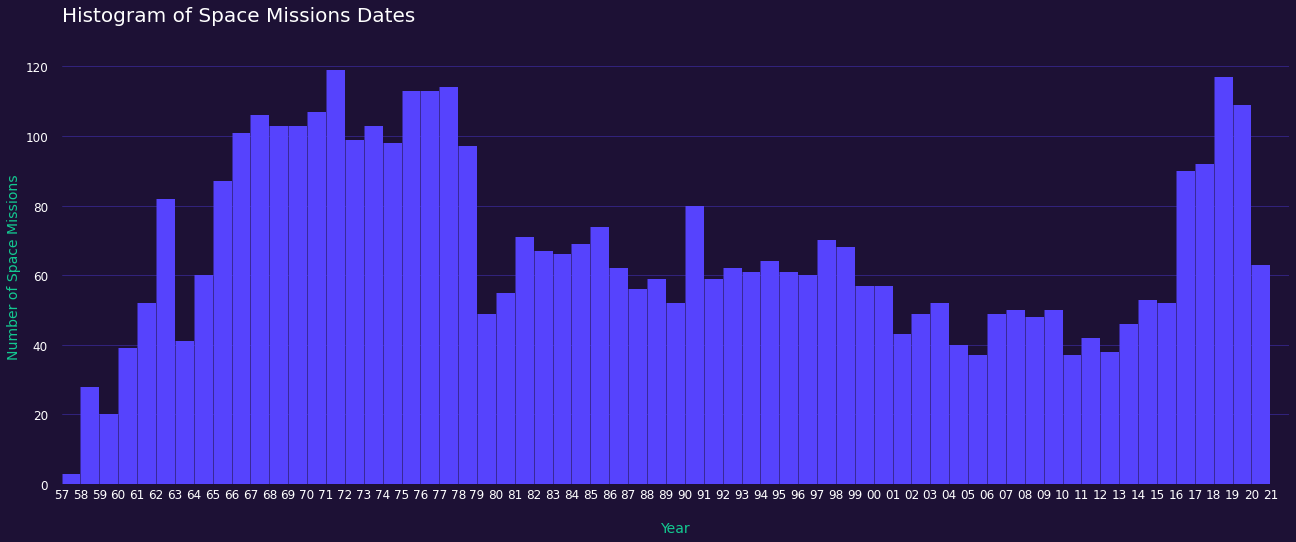

In [21]:
# convert the date format to matplotlib date format 
plt_date = mdates.date2num(df['Datum'])
bins = mdates.datestr2num(["{}/01/01".format(i) for i in np.arange(1957, 2022)])

# plot it
fig, ax = plt.subplots(1, figsize=(22,8), facecolor='#1d1135')
ax.set_facecolor('#1d1135')

n, bins, patches = plt.hist(plt_date, bins=bins, color='#5643fd')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.xlim(mdates.datestr2num(['1957/01/01','2021/12/31']))

#grid

plt.grid(axis='y', color='#5643fd', lw = 0.5, alpha=0.7)
plt.grid(axis='x', color='#1d1135', lw = 0.5)

#remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='both', which='both',length=0)


# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))

plt.xticks(c='w', fontsize=12)
plt.yticks(c='w', fontsize=12)

plt.title('Histogram of Space Missions Dates\n', loc = 'left', fontsize = 20, c='w')
plt.xlabel('\nYear', c='#13ca91', fontsize=14)
plt.ylabel('Number of Space Missions', c='#13ca91', fontsize=14)
plt.savefig('hist.png', facecolor='#1d1135')

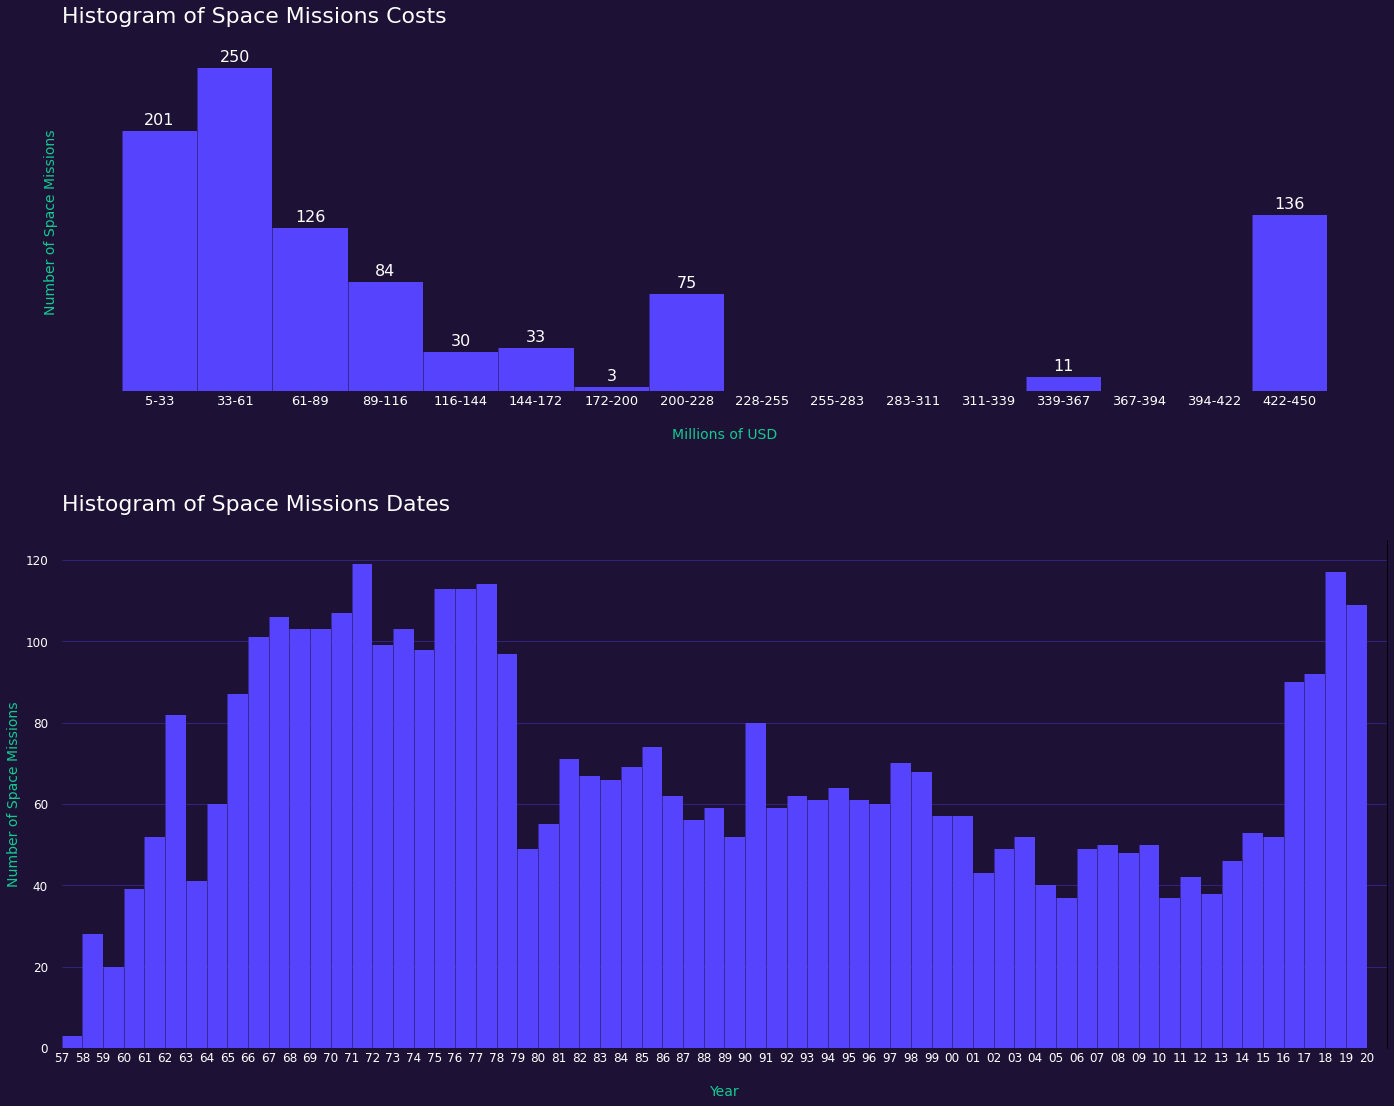

In [23]:
fig = plt.figure(figsize=(20,16), facecolor='#1d1135')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 3]) 
ax = plt.subplot(gs[0])
ax.set_facecolor('#1d1135')

n, bins, patches = plt.hist(df.Rocket, color='#5643fd', bins='doane')

#grid
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='#1d1135', lw = 0.5)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}-{:.0f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels, c='w', fontsize=12)
# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])

# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center', fontsize = 16, c='w')

plt.title('Histogram of Space Missions Costs\n', loc = 'left', fontsize = 22, c='w')
plt.xlabel('\nMillions of USD', c='#13ca91', fontsize=14)
plt.ylabel('Number of Space Missions', c='#13ca91', fontsize=14)

# convert the date format to matplotlib date format 
mpl_data = mdates.date2num(df['Datum'])
bins = mdates.datestr2num(["{}/01/01".format(i) for i in np.arange(1957, 2021)])

# plot it
ax = plt.subplot(gs[1])
ax.set_facecolor('#1d1135')

n, bins, patches = plt.hist(mpl_data, bins=bins, color='#5643fd')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.xlim(mdates.datestr2num(['1957/01/01','2020/12/31']))

#grid

plt.grid(axis='y', color='#5643fd', lw = 0.5, alpha=0.7)
plt.grid(axis='x', color='#1d1135', lw = 0.5)

#remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='both', which='both',length=0)


# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))

plt.xticks(c='w', fontsize=12)
plt.yticks(c='w', fontsize=12)

plt.title('\nHistogram of Space Missions Dates\n', loc = 'left', fontsize = 22, c='w')
plt.xlabel('\nYear', c='#13ca91', fontsize=14)
plt.ylabel('Number of Space Missions', c='#13ca91', fontsize=14)

fig.tight_layout(pad=3.0)
plt.savefig('Space.png')